In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c6cb268c-dbee-f37f-9ca1-c7fd3e16a96e)


In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow_datasets as tfds
# using tensorflow datasets we can directly get dataset in form of tensors
datasets=tfds.list_builders()
datasets

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [ ]:
(train_data,test_data),ds_info=tfds.load(name="food101",
                                      split=["train","validation"],
                                       shuffle_files=True,
                                       as_supervised=True, # data gets returned in tuple format (data,label)
                                       with_info=True) # for info to be stored in ds_info


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
ds_info.features

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir=PosixGPath('/tmp/tmpdy0ro614tfds'),
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examp

In [ ]:
class_names=ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# checking whether labels are one hot encoded or label encoded
train_sample=train_data.take(1)
train_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_sample:
  print(f"target class: {label}\n class name: {class_names[label]}")
# labels are label encoded so we need to use sparse categoricalcrossentropy as loss function

target class: 93
 class name: steak


In [ ]:
image

<tf.Tensor: shape=(512, 288, 3), dtype=uint8, numpy=
array([[[148, 103,  36],
        [147, 102,  35],
        [147, 102,  35],
        ...,
        [146, 111,  53],
        [146, 111,  53],
        [146, 111,  53]],

       [[147, 102,  35],
        [147, 102,  35],
        [148, 103,  36],
        ...,
        [145, 110,  52],
        [145, 110,  52],
        [145, 110,  52]],

       [[143,  98,  31],
        [144,  99,  32],
        [146, 101,  33],
        ...,
        [146, 111,  55],
        [146, 111,  55],
        [145, 110,  54]],

       ...,

       [[113,  69,  94],
        [113,  69,  94],
        [112,  68,  93],
        ...,
        [ 77,  53,  67],
        [ 76,  52,  66],
        [ 78,  54,  68]],

       [[115,  71,  96],
        [115,  71,  96],
        [114,  70,  95],
        ...,
        [ 79,  55,  69],
        [ 81,  54,  69],
        [ 82,  55,  70]],

       [[116,  72,  97],
        [117,  73,  98],
        [117,  73,  98],
        ...,
        [ 75,  51,  6

In [ ]:
import tensorflow as tf
tf.reduce_max(image),tf.reduce_min(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

(-0.5, 287.5, 511.5, -0.5)

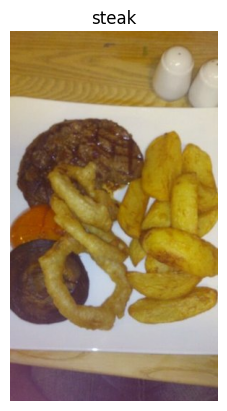

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label])
plt.axis("off")

Now we need to preprocess our data:
* we have uint8 datatype so this needs to be converted into float32 or float16.
* resize the image.
** as we need every image to be of same size in a batch.
* rescale our image between 0 & 255.

In [ ]:

def preprocess_img(image, label):
  image=tf.image.resize(image,[224,224])
  return tf.cast(image,tf.float32), label

In [ ]:
preprocessed_img=preprocess_img(image,label)[0]
print(label)
print(f"Image before preprocessing:\n {image},\n Shape: {image.shape},\n DataType: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img},\n Shape: {preprocessed_img.shape},\n Datatype: {preprocessed_img.dtype}")

tf.Tensor(93, shape=(), dtype=int64)
Image before preprocessing:
 [[[148 103  36]
  [147 102  35]
  [147 102  35]
  ...
  [146 111  53]
  [146 111  53]
  [146 111  53]]

 [[147 102  35]
  [147 102  35]
  [148 103  36]
  ...
  [145 110  52]
  [145 110  52]
  [145 110  52]]

 [[143  98  31]
  [144  99  32]
  [146 101  33]
  ...
  [146 111  55]
  [146 111  55]
  [145 110  54]]

 ...

 [[113  69  94]
  [113  69  94]
  [112  68  93]
  ...
  [ 77  53  67]
  [ 76  52  66]
  [ 78  54  68]]

 [[115  71  96]
  [115  71  96]
  [114  70  95]
  ...
  [ 79  55  69]
  [ 81  54  69]
  [ 82  55  70]]

 [[116  72  97]
  [117  73  98]
  [117  73  98]
  ...
  [ 75  51  65]
  [ 75  48  63]
  [ 76  49  64]]],
 Shape: (512, 288, 3),
 DataType: <dtype: 'uint8'>

Image after preprocessing:
 [[[147.30612  102.30612   35.30612 ]
  [147.27551  102.27551   35.27551 ]
  [148.61224  103.61224   36.612244]
  ...
  [145.61224  110.61225   52.612247]
  [145.35715  110.35714   52.357143]
  [145.35715  110.35714   52.357

In [ ]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# autotune allows us to use all the compute power or CPU's provided in colab without this it would by default utilize just one CPU chip
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=64).prefetch(buffer_size=tf.data.AUTOTUNE)
# we shuffled our data already while downloading it but doing it again so that it does not learn any particular orer to be safe
# if we set buffer size in shuffle to be length of train data, it will shuffle them all at once. In our case it will shuffle 1000 samples at once.
test_data=test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(64).prefetch(tf.data.AUTOTUNE)
# autotune in prefetch will use all CPU available to preprocess our data whilst previous one is being computed on GPU.

* The first part of the function does a shuffle. The goal of this one is to take the next X images, where X is the buffer size, and mix them every time we pass over the dataset, This ensures that the data is shuffled differently at every epoch of the training, but since the buffer size has to be small for performance sake, it does not replace the original shuffling of the full dataset. The data is then separated in batches and then repeated forever. The last step is to prefetch some data, which preloads the data to be used in the future, to help with performance.
* It is important to understand that even if one element is taken from the dataset, there are 32 images loaded because an element in this case corresponds to a batch.
* **padded_shapes**:  A (nested) structure of tf.TensorShape or tf.int64 vector tensor-like objects representing the shape to which the respective component of each input element should be padded prior to batching. Any unknown dimensions will be padded to the maximum size of that dimension in each batch. If unset, all dimensions of all components are padded to the maximum size in the batch. padded_shapes must be set if any component has an unknown rank.
* **drop_remainder**: A tf.bool scalar tf.Tensor, representing whether the last batch should be dropped in the case it has fewer than batch_size elements; the default behavior is not to drop the smaller batch.
* Most dataset input pipelines should end with a call to ***prefetch***. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.
* **cache**: when you cache a dataset, the transformations before the cache one (like the file opening and data reading) are executed only during the first epoch. The next epochs will reuse the data cached by thecache transformation. But this will work only if our RAM can store that much data.

In [ ]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
#  callbacks
import tensorflow as tf
import datetime
def tensorboard_callback(dir_name,filename):
  log_dir=dir_name+"/"+filename+datetime.datetime.now().strftime("%d/%m/%Y-%H/%M/%S")
  tensorboard=tf.keras.callbacks.TensorBoard(log_dir)
  print(f"Saving tensorboard log files to {log_dir}.")
  return tensorboard


In [ ]:
#  mixed precision: It utilizes combination of float16 and float32 data types to speed up model performance.
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

 # Mixed Precision:
 * It utilizes combination of float16 and float32 data types to speed up model performance.
 * Computation or model finding patterns is done using float16 but variable storage is done using float32 datatype.
 * Output layer i.e. dense layer has to be used with dtype float32 as float16 is not numericaly stable datatype.
 * Adding a float16 softmax in the middle of a model is fine, but a softmax at the end of the model should be in float32. The reason is that if the intermediate tensor flowing from the softmax to the loss is float16 or bfloat16, numeric issues may occur.

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_aug=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
])

In [ ]:
# feature extraction model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

base_model=tf.keras.applications.EfficientNetB4(include_top=False)
# base_model.layers[0].dtype_policy=tf.float32
base_model.trainable=False
inputs=layers.Input(shape=(224,224,3),name="input")
x=data_aug(inputs)
# if not using efficientnet like model then we need to rescale our data
#  x=preprocessing.Rescaling(1/255)(x)
x=base_model(inputs,training=False) # makes sure layers that need to be in inference mode stay like that only
x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax", dtype=tf.float32, name="softmax_layer")(x)
model=tf.keras.Model(inputs,outputs)

# compile
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional  (None, None, None, 1792   17673823  
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1792)              0         
 gePooling2D)                                                    
                                                                 
 dropout_2 (Dropout)         (None, 1792)              0         
                                                                 
 dense_2 (Dense)             (None, 101)               181093    
                                                                 
 softmax_layer (Activation)  (None, 101)               0   

In [ ]:
# checking whether our layers are using mixed precision or not
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)
  # it changes computing datatype for those layers which can run on float16 also to increase tensor storage capacity on GPU and the rest runs on float32. We can also hardcode some layers to run on a particular datatype like we did for output layer or activation layer.

input True float32 <Policy "float32">
efficientnetb4 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dropout_2 True float32 <Policy "mixed_float16">
dense_2 True float32 <Policy "mixed_float16">
softmax_layer True float32 <Policy "float32">


In [ ]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_3 False float32 <Policy "float32">
rescaling_4 False float32 <Policy "mixed_float16">
normalization_2 False float32 <Policy "mixed_float16">
rescaling_5 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

In [ ]:
history101=model.fit(train_data,
                     epochs=5,
                     validation_data=test_data,
                     validation_steps=int(0.15*len(test_data)),
                     callbacks=[tensorboard_callback("food_vision","efficientnetb4")])

Saving tensorboard log files to food_vision/efficientnetb414/12/2023-15/36/31.
Epoch 1/5
592/592 [==============================] - 242s 373ms/step - loss: 2.1267 - accuracy: 0.4984 - val_loss: 1.4254 - val_accuracy: 0.6344
Epoch 2/5
592/592 [==============================] - 245s 410ms/step - loss: 1.5286 - accuracy: 0.6091 - val_loss: 1.2668 - val_accuracy: 0.6738
Epoch 3/5
592/592 [==============================] - 235s 393ms/step - loss: 1.3973 - accuracy: 0.6382 - val_loss: 1.1954 - val_accuracy: 0.6829
Epoch 4/5
592/592 [==============================] - 226s 377ms/step - loss: 1.3198 - accuracy: 0.6573 - val_loss: 1.1589 - val_accuracy: 0.6926
Epoch 5/5
592/592 [==============================] - 229s 380ms/step - loss: 1.2679 - accuracy: 0.6667 - val_loss: 1.1303 - val_accuracy: 0.7010


In [ ]:
result=model.evaluate(test_data)

198/198 [==============================] - 65s 327ms/step - loss: 1.1340 - accuracy: 0.6983


In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  accuracy=history.history["accuracy"]
  epoch=range(len(history.history["loss"]))
  plt.plot(epoch,accuracy,label="training_accuracy")
  plt.plot(epoch,history.history["val_accuracy"],label="validation accuracy")
  plt.xlabel("epochs")
  plt.title("accuracy")
  plt.legend()

  plt.figure()
  plt.plot(epoch,history.history["loss"],label="training loss")
  plt.plot(epoch,history.history["val_loss"],label="validation loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend()

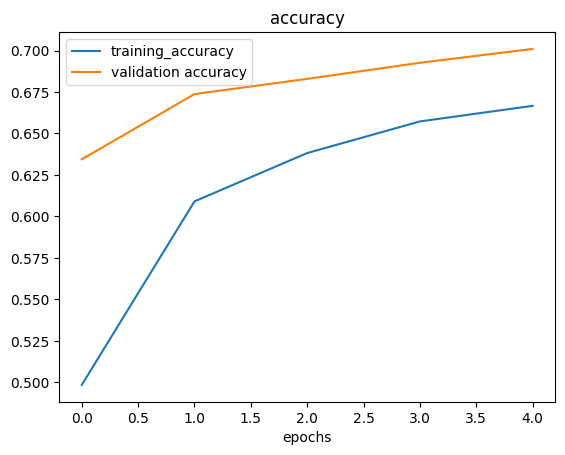

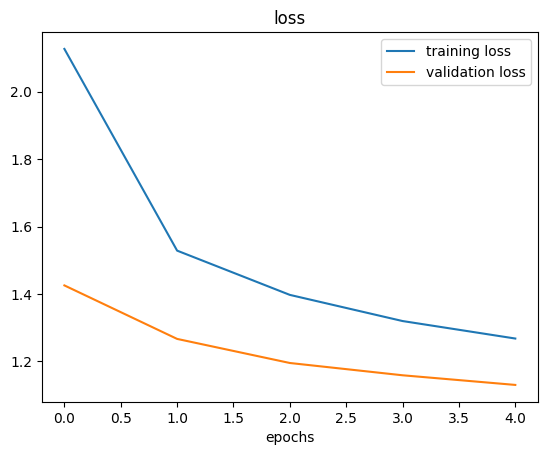

In [ ]:
plot_loss(history101)

In [ ]:
acc=history101.history["accuracy"]

In [ ]:
acc

[0.49844223260879517,
 0.6090825200080872,
 0.6382178068161011,
 0.6572673320770264,
 0.6666666865348816]

In [ ]:
model.save("/content/drive/MyDrive/projects saved model/food/base_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/projects saved model/food/base_model1.h5")

In [ ]:
loaded_model.evaluate(test_data)

395/395 [==============================] - 73s 162ms/step - loss: 1.1340 - accuracy: 0.6982


[1.1339884996414185, 0.6982178092002869]

In [ ]:
for layer in loaded_model.layers:
  print(layer.name,layer.trainable,layer.dtype_policy)

input True <Policy "float32">
efficientnetb4 True <Policy "mixed_float16">
pooling_layer True <Policy "mixed_float16">
dropout_2 True <Policy "mixed_float16">
dense_2 True <Policy "mixed_float16">
softmax_layer True <Policy "float32">


In [ ]:
# lets make all the layers of the model trainable as it is a large datset
for layer in loaded_model.layers:
  layer.trainable=True
  print(layer.name,layer.trainable,layer.dtype_policy)

input True <Policy "float32">
efficientnetb4 True <Policy "mixed_float16">
pooling_layer True <Policy "mixed_float16">
dropout_2 True <Policy "mixed_float16">
dense_2 True <Policy "mixed_float16">
softmax_layer True <Policy "float32">


In [ ]:
for i,layer in enumerate(loaded_model.layers[1].layers):
  print(i,layer,layer.trainable, layer.dtype_policy)

0 <keras.src.engine.input_layer.InputLayer object at 0x7a8db5b84d00> True <Policy "float32">
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7a8db5b856c0> True <Policy "mixed_float16">
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7a8db5b857e0> True <Policy "mixed_float16">
3 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7a8db5b84400> True <Policy "mixed_float16">
4 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7a8db5b85270> True <Policy "mixed_float16">
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a8db5b87940> True <Policy "mixed_float16">
6 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7a8db5b863e0> True <Policy "mixed_float16">
7 <keras.src.layers.core.activation.Activation object at 0x7a8db5b867a0> True <Policy "mixed_float16">
8 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7a8db5b87790> True 

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                 patience=6,
                                                verbose=1,
                                                restore_best_weights=True) # Number of epochs with no improvement after which training will be stopped.

reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="accuracy",
                                               factor=0.2, # by what factor lr to be reduced
                                               patience=0,
                                               min_lr=0,
                                               verbose=1)

### **Callbacks**-->

---


* **Early Stopping callback**: Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the `min_delta` and `patience` if applicable. Once it's found no longer decreasing, `model.stop_training` is marked True and the training terminates.
> min_delta***: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.


---
* **Reduce LR on Plateau**: Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
>> * ***cooldown***: number of epochs to wait before resuming normal operation after lr has been reduced.
>> * For example, let's say cooldown=5. After the learning rate is reduced, the algorithm waits 5 epochs before starting to monitor the metrics again. So if there is no improvement in the metric and patience=10, the learning rate will be reduced again after 15 epochs.

---

In [ ]:
loaded_model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(0.001))

tuned_history101=loaded_model.fit(train_data,
                           epochs=50,
                           validation_data=test_data,
                          #  steps_per_epoch=int(len(train_data)/32),
                           validation_steps=int(0.15*len(test_data)),
                           callbacks=[tensorboard_callback("food_vision","efficientnetb4_tuned"),
                                      reduce_lr,
                                      early_stopping])

In [ ]:
tuned_result=loaded_model.evaluate(test_data)
tuned_result

395/395 [==============================] - 66s 167ms/step - loss: 1.1904 - accuracy: 0.8086


[1.1903809309005737, 0.8086336851119995]

In [ ]:
loaded_model.save("/content/drive/MyDrive/projects saved model/food/tuned_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def compare_history(original,new,initial_epoch=5):
  acc=original.history["accuracy"]
  loss=original.history["loss"]
  val_loss=original.history["val_loss"]
  val_acc=original.history["val_accuracy"]

  total_acc=acc+new.history["accuracy"]
  total_loss=loss+new.history["loss"]
  total_val_acc=val_acc+new.history["val_accuracy"]
  total_val_loss=val_loss+new.history["val_loss"]

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Validation Accuracy")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine Tuning Starts")
  plt.legend()
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss,label="Validation_loss")
  plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label="Fine Tuning Starts")
  plt.legend()
  plt.title("Training and Validation Loss")


In [ ]:
compare_history(history101,tuned_history101)
# we can clearly see that after fine tuning training accuracy is increasing at a good rate while validation accuracy decreases at quite a slow rate, this indiactes that our model is overfitted over the dataset

In [ ]:
pred_prob=loaded_model.predict(test_data,verbose=1)
pred_prob[0]

395/395 [==============================] - 70s 168ms/step


array([5.6422315e-13, 9.9979848e-01, 1.5249848e-11, 1.5008941e-13,
       5.5339270e-12, 1.6316593e-16, 2.0306327e-16, 1.1110213e-13,
       8.0345802e-10, 1.5036039e-14, 7.4210029e-09, 1.0977497e-15,
       6.1578173e-16, 6.2906066e-17, 7.5924526e-13, 2.3555753e-16,
       3.5842795e-17, 2.6748341e-15, 5.4073473e-10, 5.2658482e-11,
       7.8428231e-05, 2.7234877e-12, 3.0010809e-16, 1.2687748e-10,
       2.1910262e-17, 1.6648346e-12, 1.0662148e-14, 1.4176102e-16,
       2.5731308e-13, 2.2302139e-16, 1.9335739e-17, 1.8606105e-13,
       4.9687945e-14, 8.1137565e-13, 9.8608738e-15, 2.8533386e-14,
       2.9087471e-16, 1.6788944e-08, 3.9389127e-13, 2.7939411e-11,
       4.7665979e-11, 6.2322645e-14, 1.9876072e-09, 4.7698309e-13,
       2.3421630e-15, 1.4065783e-16, 2.0595082e-13, 1.2394336e-13,
       1.7818236e-15, 5.3741521e-12, 7.1530859e-10, 2.6901512e-16,
       4.9792516e-13, 1.1959844e-10, 7.6382104e-12, 8.1467290e-12,
       8.5853071e-14, 4.3508220e-14, 3.0593581e-18, 5.1388442e

In [ ]:
print(f"class with highest predicted probability for first test dataset: {pred_prob[0].argmax()}")

class with highest predicted probability for first test dataset: 1


In [ ]:
pred_class=pred_prob.argmax(axis=1)
pred_class[:10]

array([ 1, 96, 61, 74, 54, 76, 34, 90, 15,  4])

In [ ]:
y_labels=[]
for images,labels in test_data.unbatch():
  y_labels.append(int(labels))

y_labels[:10]

[28, 12, 4, 66, 55, 32, 19, 42, 63, 91]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_labels,pred_class)
fig,ax=plt.subplots(figsize=(100,100))
ax=sns.heatmap(cm,annot=True,cmap="YlGnBu",linewidth=0.2,xticklabels=class_names,yticklabels=class_names,fmt=".0f",cbar=False)
ax.set(xlabel="Predicted Label",ylabel="True Label",title="Confusion Matrix")
ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(25)
ax.title.set_size(30)
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_class))
# this gives evaluation for each class

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       250
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       250
           3       0.01      0.01      0.01       250
           4       0.01      0.01      0.01       250
           5       0.01      0.01      0.01       250
           6       0.01      0.01      0.01       250
           7       0.01      0.01      0.01       250
           8       0.00      0.00      0.00       250
           9       0.00      0.00      0.00       250
          10       0.01      0.01      0.01       250
          11       0.00      0.00      0.00       250
          12       0.01      0.01      0.01       250
          13       0.01      0.01      0.01       250
          14       0.02      0.02      0.02       250
          15       0.01      0.00      0.00       250
          16       0.01      0.01      0.01       250
          17       0.02    

In [ ]:
classification_dict=classification_report(y_labels,pred_class,output_dict=True)
# store classification report in dictionary
classification_dict


{'0': {'precision': 0.012396694214876033,
  'recall': 0.012,
  'f1-score': 0.012195121951219513,
  'support': 250},
 '1': {'precision': 0.003676470588235294,
  'recall': 0.004,
  'f1-score': 0.003831417624521073,
  'support': 250},
 '2': {'precision': 0.004219409282700422,
  'recall': 0.004,
  'f1-score': 0.004106776180698151,
  'support': 250},
 '3': {'precision': 0.01327433628318584,
  'recall': 0.012,
  'f1-score': 0.012605042016806723,
  'support': 250},
 '4': {'precision': 0.00816326530612245,
  'recall': 0.008,
  'f1-score': 0.00808080808080808,
  'support': 250},
 '5': {'precision': 0.008438818565400843,
  'recall': 0.008,
  'f1-score': 0.008213552361396302,
  'support': 250},
 '6': {'precision': 0.008097165991902834,
  'recall': 0.008,
  'f1-score': 0.008048289738430582,
  'support': 250},
 '7': {'precision': 0.009345794392523364,
  'recall': 0.008,
  'f1-score': 0.008620689655172412,
  'support': 250},
 '8': {'precision': 0.004166666666666667,
  'recall': 0.004,
  'f1-score': 

In [ ]:
import pandas as pd
class_f1={}
for k,v in classification_dict.items():
  if k=="accuracy":
    break
  else:
    class_f1[class_names[int(k)]]=v["f1-score"]

f1_score=pd.DataFrame({"class":class_f1.keys(),"f1-score":class_f1.values()}).sort_values("f1-score",ascending=False)
f1_score

,class,f1-score
94,strawberry_shortcake,0.028169
85,samosa,0.025918
50,grilled_salmon,0.025641
71,paella,0.025586
74,peking_duck,0.023810
...,...,...
9,breakfast_burrito,0.000000
79,prime_rib,0.000000
52,gyoza,0.000000
72,pancakes,0.000000


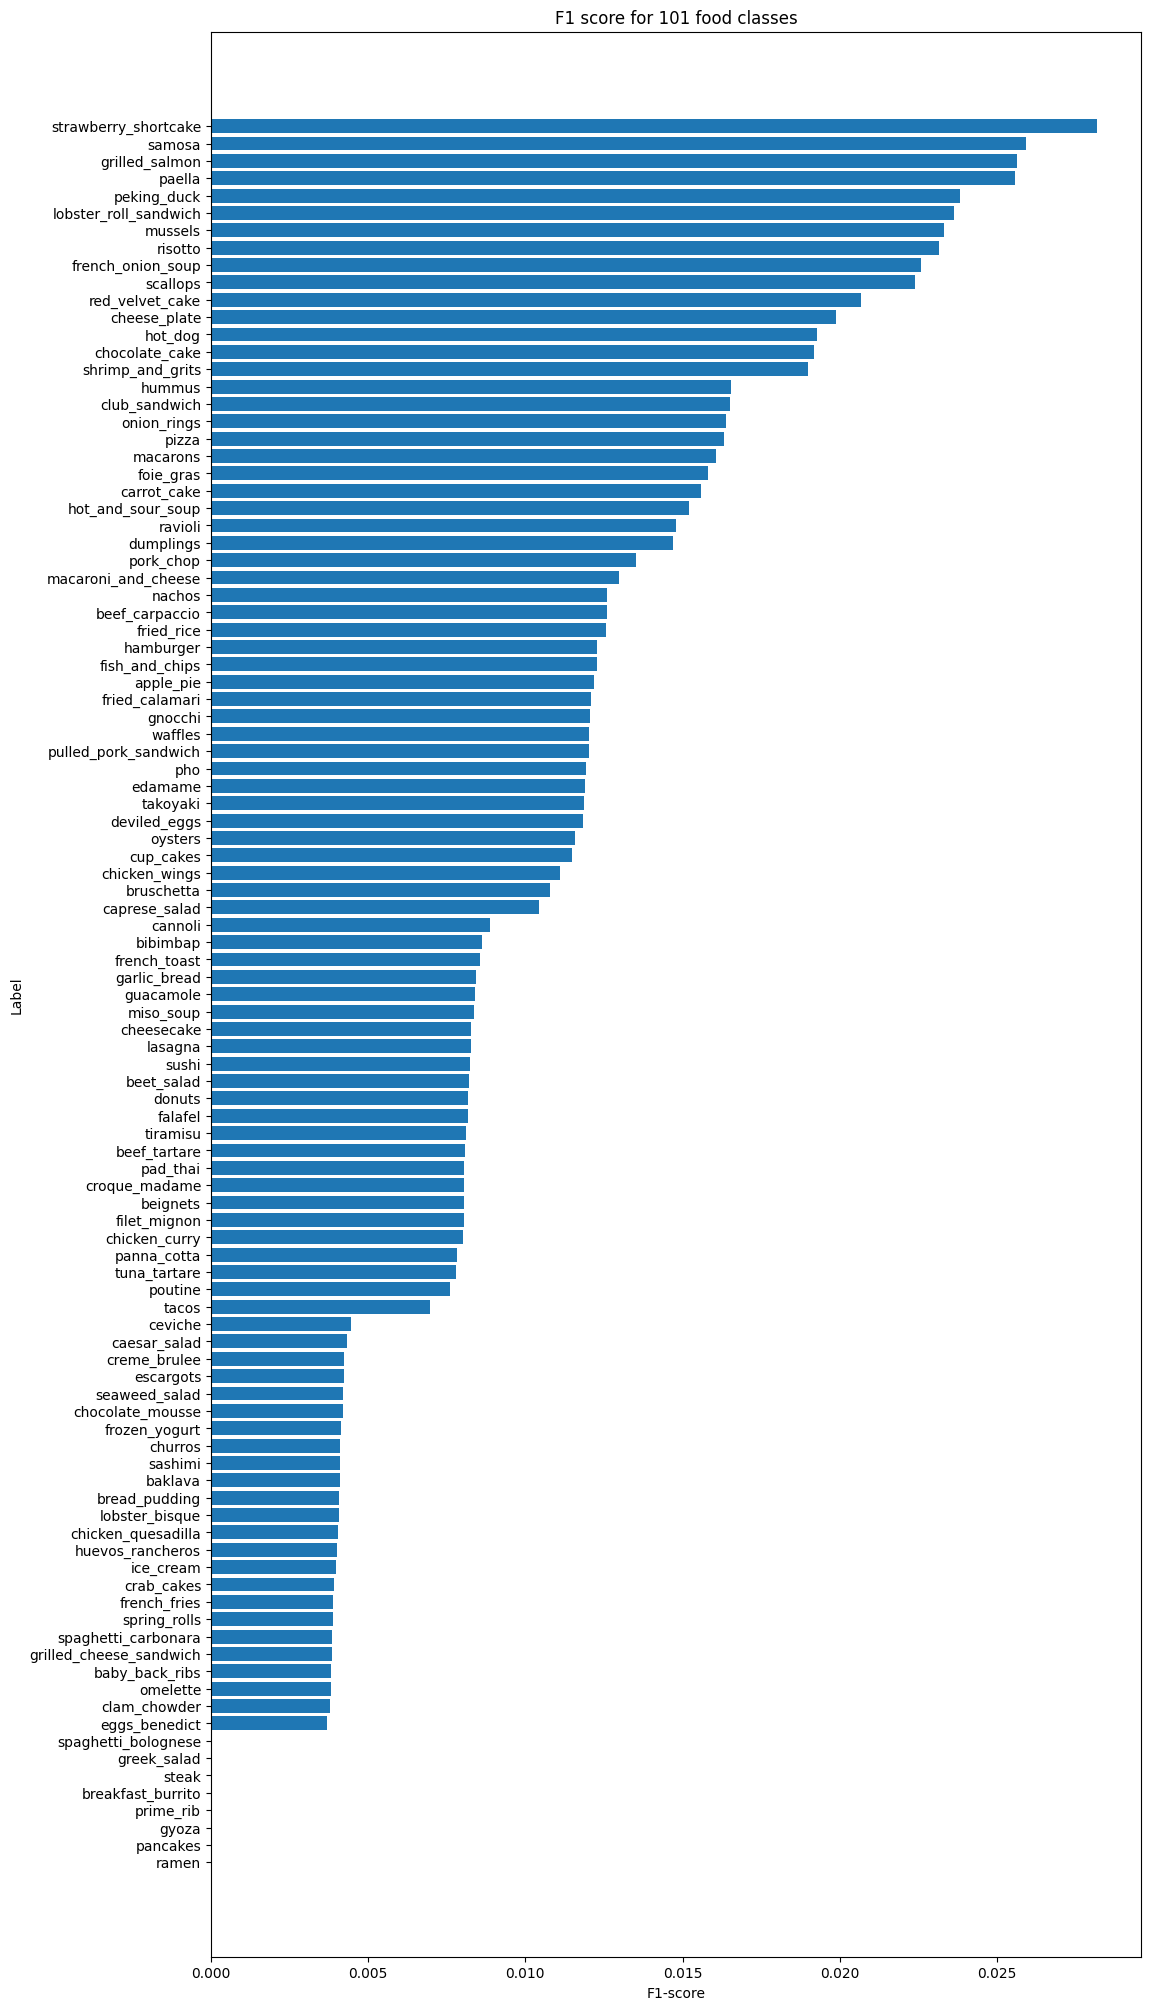

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,25))
score=ax.barh(f1_score["class"],f1_score["f1-score"])
ax.set_xlabel("F1-score")
ax.set_ylabel("Label")
ax.set_title("F1 score for 101 food classes")
ax.invert_yaxis()